In [3]:
# Import libraries and dependencies

import pandas as pd
import numpy as np
import sys, os 
import psycopg2
import pg
from pathlib import Path
from statsmodels.tsa.arima_model import ARIMA
from random import random
import pandas.io.sql as psql
import statsmodels.api as sm
import matplotlib.pyplot as plt
import warnings
import itertools
%matplotlib inline




In [4]:
# import postgrsql DB
conn = pg.DB(host="localhost", user="postgres", passwd="C@sinoroyale12", dbname="postgres")

In [5]:
# establish connection to postgrSQL
conn1 = psycopg2.connect(host="localhost", port =5432, database="postgres", user="postgres", password="C@sinoroyale12" )
# create a cursor object
cur = conn1.cursor()

# # A sample query of all data from the "vendors" table in the "suppliers" database
cur.execute(""" SELECT * FROM dim_vente""")
query_results = cur.fetchall()


In [6]:
# Read the dim SQL into a Dataframe while formating and setting the 'DATECREATION_ARTICLE' COLUMNS  as the index
sql_query = pd.read_sql_query('''select * from dim_vente''', conn1, index_col='DATE_VENTE')


In [7]:
# assign the fields into the DataFrame
df = pd.DataFrame(sql_query, columns=['ID_VENTE', 'ID_ARTICLE', 'ID_CLIENT', 'ID_ETABLISSEMENT', 'LIBELLE_VENTE', 'PRIX_VENTE', 'DEVISE_VENTE', 'DATE_VENTE', 'ANNEE_VENTE', 'MOIS_VENTE'])



df.head()

,ID_VENTE,ID_ARTICLE,ID_CLIENT,ID_ETABLISSEMENT,LIBELLE_VENTE,PRIX_VENTE,DEVISE_VENTE,DATE_VENTE,ANNEE_VENTE,MOIS_VENTE
DATE_VENTE,,,,,,,,,,
2009-01-12,1,ML1212 003001 X,SC000019,001,Polo Homme Taille 3 Coloris Blanc,96.88,EUR,NaN,2009,1
2009-01-12,2,ML1212 003007 X,SC000019,001,Polo Homme Taille 3 Coloris Acidulé,96.88,EUR,NaN,2009,1
2009-01-12,3,ML1212 004001 X,SC000019,001,Polo Homme Taille 4 Coloris Blanc,193.75,EUR,NaN,2009,1
2009-01-12,4,ML1212 004007 X,SC000019,001,Polo Homme Taille 4 Coloris Acidulé,193.75,EUR,NaN,2009,1
2009-01-12,5,ML1212 005001 X,SC000019,001,Polo Homme Taille 5 Coloris Blanc,290.63,EUR,NaN,2009,1


In [8]:
# droping columns except 'PRIX_VENTE' & 'DATE_VENTE'
df.drop(columns=['ID_VENTE', 'ID_ARTICLE', 'ID_CLIENT', 'ID_ETABLISSEMENT', 'LIBELLE_VENTE', 'DEVISE_VENTE', 'ANNEE_VENTE', 'MOIS_VENTE'], inplace=True)
df.isnull().sum()
df.head()

,PRIX_VENTE,DATE_VENTE
DATE_VENTE,,
2009-01-12,96.88,NaN
2009-01-12,96.88,NaN
2009-01-12,193.75,NaN
2009-01-12,193.75,NaN
2009-01-12,290.63,NaN


In [9]:
# Changed data type to float
df.astype(float, copy=True)
df.head()

,PRIX_VENTE,DATE_VENTE
DATE_VENTE,,
2009-01-12,96.88,NaN
2009-01-12,96.88,NaN
2009-01-12,193.75,NaN
2009-01-12,193.75,NaN
2009-01-12,290.63,NaN


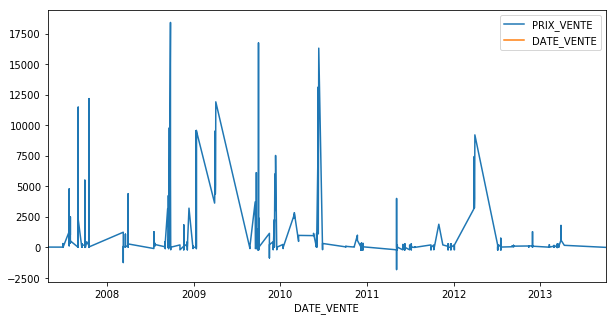

In [10]:
# plot data of 'Prix_vente'
df.plot(figsize=(10,5))
plt.show()

In [11]:
# simple moving average rolling for 30 days
sma_30 = df.rolling(window=30).mean()
sma_30.head()

,PRIX_VENTE,DATE_VENTE
DATE_VENTE,,
2009-01-12,NaN,NaN
2009-01-12,NaN,NaN
2009-01-12,NaN,NaN
2009-01-12,NaN,NaN
2009-01-12,NaN,NaN


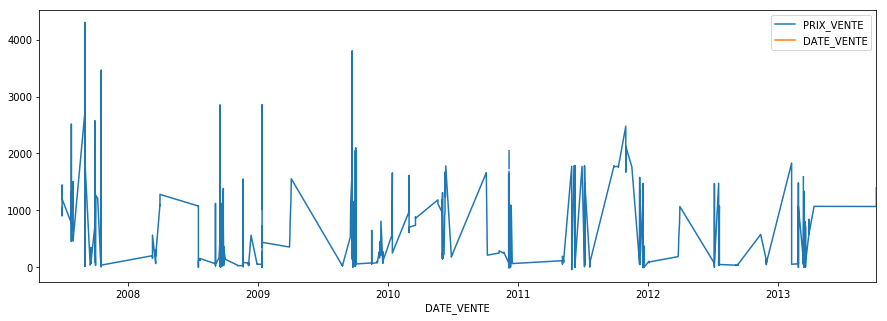

In [12]:
# Plot 30 simple moving average
sma_30.plot(figsize=(15,5))

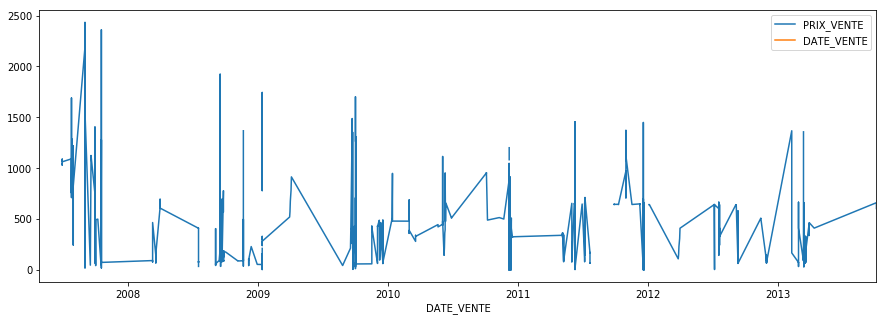

In [13]:
# Plot 90 simple moving average
sma_90 = df.rolling(window=90).mean()
sma_90.head()
sma_90.plot(figsize=(15,5))

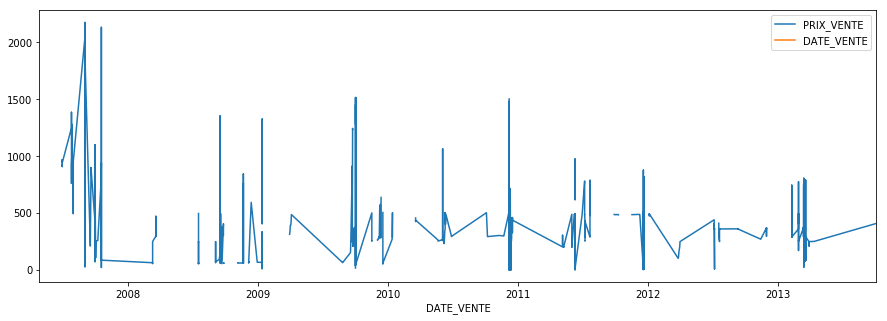

In [14]:
# Plot 180 simple moving average
sma_180 = df.rolling(window=180).mean()
sma_180.head()
sma_180.plot(figsize=(15,5))

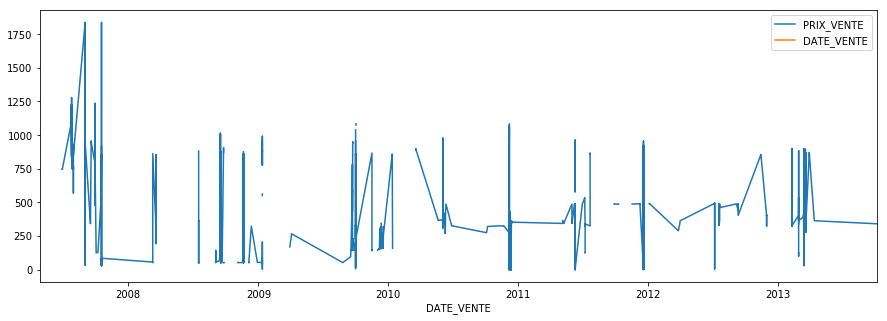

In [15]:
## Plot 365 simple moving average
sma_365 = df.rolling(window=365).mean()
sma_365.head()
sma_365.plot(figsize=(15,5))

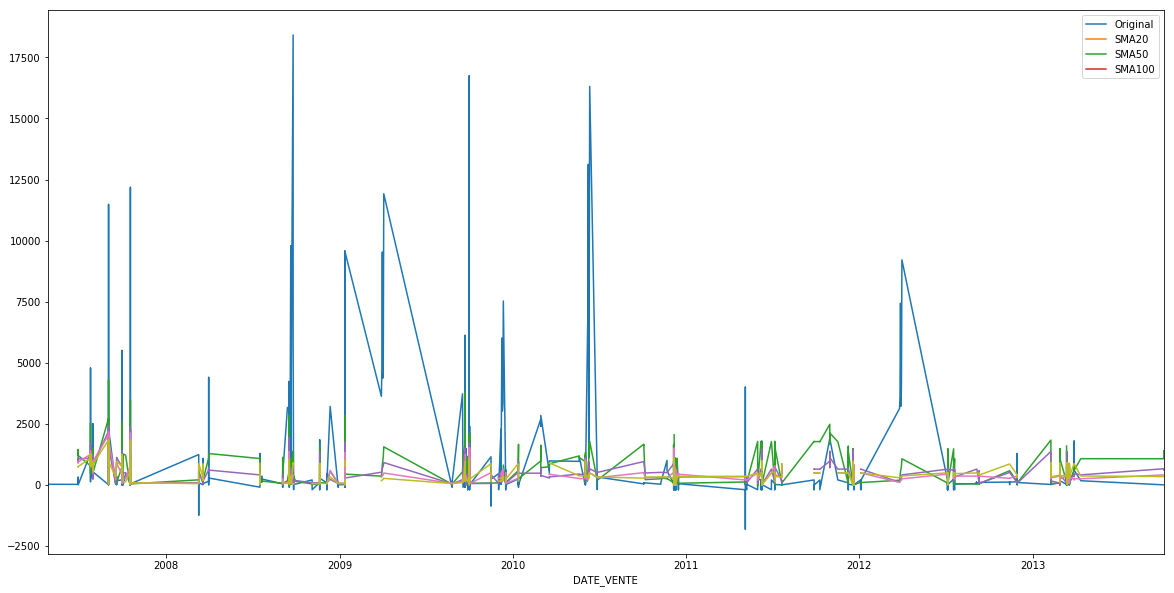

In [16]:
ax = df.plot(figsize=(20,10))

# Overlay SMA20, SMA50, and SMA100 on the same figure
sma_30.plot(ax=ax)
sma_90.plot(ax=ax)
sma_180.plot(ax=ax)
sma_365.plot(ax=ax)

# Set the legend of the figure
ax.legend(["Original", "SMA20", "SMA50", "SMA100"]);

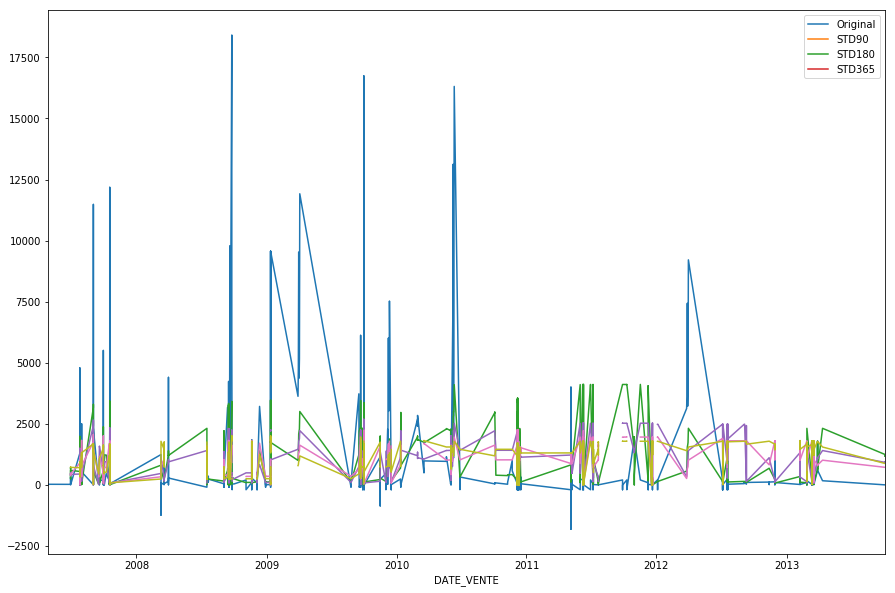

In [17]:
ax = df.plot(figsize=(15,10))

# Overlay STD30, STD90, STD180 and STD365 on the same figure Standard deviation
df.rolling(window=30).std().plot(ax=ax)
df.rolling(window=90).std().plot(ax=ax)
df.rolling(window=180).std().plot(ax=ax)
df.rolling(window=365).std().plot(ax=ax)

# Set the legend of the figure
ax.legend(["Original", "STD90", "STD180", "STD365"]);